# Machine Learning Pset 1 Question 2
## Mong Chang Hsi
## 1003085

#### People who I've talked to Xiang Qian, Jireh and Andri

In [167]:
# import all the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import accuracy_score
from numpy.linalg import inv
import random
from matplotlib.pyplot import cm

In [168]:
# Reading the Input Files
with open("hw1x.dat", "r") as reader:
    input_data = []
    for line in reader.readlines():
        input_data.append(line.strip())
    input_data.pop(len(input_data)-1)
    for index in range(len(input_data)):
        input_data[index] = float(input_data[index])

# Reading the Output Files
with open("hw1y.dat", "r") as reader:
    output_data = []
    for line in reader.readlines():
        output_data.append(line)
    output_data.pop(len(output_data)-1)
    for index in range(len(output_data)):
        output_data[index] = float(output_data[index])

## Part a

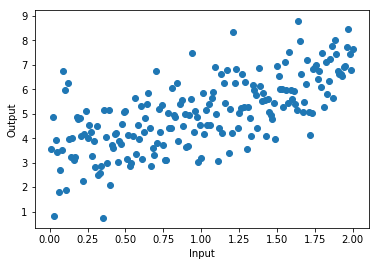

In [169]:
# Plotting a Scatter Plot

plt.scatter(input_data, output_data)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Part b

In [182]:
# adding in a new column vector of 1s

input_np = np.array(input_data)
output_np = np.array(output_data)

clean_x = np.reshape(input_np, (200, 1))

def closed_form_linear_regression(x, y):
    # Add new column
    intercept = np.ones(x.shape)
    x = np.concatenate((intercept, x), 1)
    
    # Calculate the weight
    a = x.transpose().dot(x) / len(x)
    b = x.transpose().dot(y) / len(x)
    weight = inv(a).dot(b)
    return weight

weight = closed_form_linear_regression(clean_x, output_np)

[3.2447227  1.78157138]


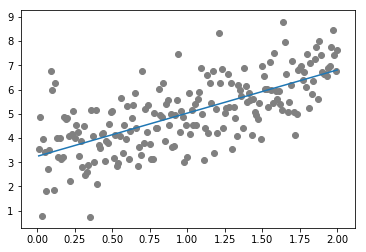

In [181]:
new_y_plot = np.array((clean_x * weight[1]) + weight[0])

# Plot the regression line
plt.plot(input_data, new_y_plot)

# Plot the original scatter plot
plt.scatter(input_data, output_data, color="grey")
plt.show()

## Part c

In [172]:
# Calculate the training error

def training_error(y_predict, y_actual):
    total_error = 0
    for i in range(len(y_predict)):
        total_error += ((y_actual[i] - y_predict[i])**2)/2
    return total_error

training_error_value = training_error(new_y_plot, output_data)
print(training_error_value)

[116.25211505]


## Part d

In [173]:
# Calculating weight using gradient descent

def gradient_descent(x, y, learning_rate, iterations):
    y = np.reshape(y, (200,1))
    
    weight_history = []
    cost_history = []
    
    # initializing weight
    weight = 0
    
    for i in range(iterations):
        # updating the weight
        weight += (-1 * learning_rate / len(x)) * ((weight * x) - y).transpose().dot(x)
        
        # recording weight
        weight_history.append(weight)
        
        # recording cost
        cost = (( weight * x ) - y ) ** 2 / 2
        cost_history.append(np.sum(cost))

    minimum_cost = min(cost_history)
    best_weight_index = cost_history.index(minimum_cost)
    best_weight = weight_history[best_weight_index]
    print("Weight with the minimum cost", best_weight)
    
gradient_descent(clean_x, output_np, 0.01, 100)


Weight with the minimum cost [[3.12056591]]


## Part e

In [179]:
def stochastic_gradient_descent(x , y, learning_rate, iterations):
    y = np.reshape(y, (200,1))
    
    weight_history = []
    cost_history = []
    
    weight = 0
    
    for i in range(iterations):
        # random shuffling of data 
        random.shuffle(x)
        
        for r in range(len(x)):
            # Error
            partial_error = ((weight * x[r]) - y[r]) * x[r]

            # updating the weight
            weight += (-1)*(learning_rate * partial_error)
    
            # recording weight
            weight_history.append(weight)

            # recording cost
            cost = (( weight * x[r] ) - y[r] ) ** 2 / 2
            cost_history.append(cost)

    minimum_cost = min(cost_history)
    best_weight_index = cost_history.index(minimum_cost)
    best_weight = weight_history[best_weight_index]
    print("Weight with the minimum cost", best_weight)

stochastic_gradient_descent(clean_x, output_np, 0.01, 50)

Weight with the minimum cost [5.01017122]


## Part f

In [175]:
def PolyRegress(x, y, d, case):
    x_original = x.copy()
    for i in range(d - 1):
        power = 2 + i
        new_array = x ** power
        x_original = np.concatenate((x_original, new_array), 1)
        
    a = x_original.transpose().dot(x_original)
    b = x_original.transpose().dot(y)
    
    weight = inv(a).dot(b)
    
    if case == 0:
        return weight
    elif case == 1:
        weight = np.reshape(weight, (-1,1))
        return x_original.dot(weight)
    else:
        weight = np.reshape(weight, (-1,1))
        y_coordinates = x_original.dot(weight)
        error = np.sum(((y_coordinates - y) ** 2)/2)
        return error

## Part g

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The Errror History: [116621.49307393824, 93785.18879956705, 84274.03552478421, 78270.58477926871, 74593.7180956832, 72189.48443101696, 70603.50002174886, 69551.6615834788]
The error deceases at every order hence providing a better fit at higher order


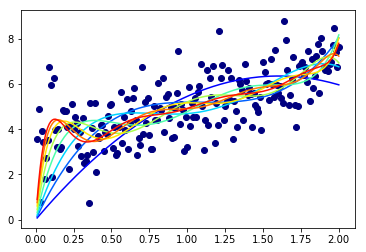

In [185]:
jet = plt.get_cmap('jet')
color = iter(jet(np.linspace(0,1,10)))
c=next(color)

plt.scatter(clean_x, output_np, c=c)

error_history = []

for i in range(2,10):
    y_coordinates = PolyRegress(clean_x, output_np, i, 1)
    error_history.append(PolyRegress(clean_x, output_np, i, 2))
    c=next(color)
    plt.plot(clean_x, y_coordinates, c=c)
    
print("The Errror History:", error_history)
print("The error deceases at every order hence providing a better fit at higher order")